In [1]:
# ex3_dineof.py
#
# Program to produce some DINEOF plots.
#
# Joseph B. Zambon
# 6 April 2018
#  Updated for new grid: 4-March 2019

In [2]:
# For inline plotting
%pylab inline

# Module declarations
import numpy as np                         # conda install numpy
                                             # Imported to express various datatypes
from pydap.client import open_url          # conda install -c conda-forge pydap 
                                             # Imported for DAP server access
import matplotlib.pyplot as plt            # conda install matplotlib
                                             # Imported for drawing figures
from mpl_toolkits.basemap import Basemap   # conda install basemap
                                             # Imported to draw publication-quality figures
from datetime import datetime              # conda install datetime
                                             # Imported to produce datetime string objects
import cmocean                             # conda install -c ioos cmocean
                                             # Imported for its perceptually-uniform colormaps
from matplotlib.colors import LogNorm      # conda install matplotlib
                                             # Imported for chlorophyll-a plotting

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Put your desired plot date in here
#                    YYYY,MM,DD
plot_date = datetime(2017, 8, 26)
print(plot_date)

2017-08-26 00:00:00


In [4]:
# Link OPeNDAP datasets
modis_sst_url = 'http://oceanus.meas.ncsu.edu:8080/thredds/dodsC/secoora/modis/sst.nc'
modis_chla_url = 'http://oceanus.meas.ncsu.edu:8080/thredds/dodsC/secoora/modis/chla.nc'
dineof_sst_url = \
          'http://oceanus.meas.ncsu.edu:8080/thredds/dodsC/secoora/dineof/sst.nc'
dineof_chla_url = \
          'http://oceanus.meas.ncsu.edu:8080/thredds/dodsC/secoora/dineof/chla.nc'

modis_sst_dataset = open_url(modis_sst_url,output_grid=False)
modis_chla_dataset = open_url(modis_chla_url,output_grid=False)
dineof_sst_dataset = open_url(dineof_sst_url,output_grid=False)
dineof_chla_dataset = open_url(dineof_chla_url,output_grid=False)
print('Available data:')
print('MODIS SST:', modis_sst_dataset.keys)
print('MODIS Chla:', modis_chla_dataset.keys)
print('DINEOF SST:', dineof_sst_dataset.keys)
print('DINEOF Chla:', dineof_chla_dataset.keys)


Available data:
MODIS SST: <bound method Mapping.keys of <DatasetType with children 'lat', 'lon', 'time', 'sst'>>
MODIS Chla: <bound method Mapping.keys of <DatasetType with children 'lat', 'lon', 'time', 'chlor_a'>>
DINEOF SST: <bound method Mapping.keys of <DatasetType with children 'lat', 'lon', 'time', 'sst'>>
DINEOF Chla: <bound method Mapping.keys of <DatasetType with children 'lat', 'lon', 'time', 'chlor_a'>>


In [5]:
# Find time index from available times

plot_date = datetime.toordinal(plot_date)
times = np.array(modis_sst_dataset['time'])
for t in range(0,np.size(times)):
    times[t] = datetime.toordinal(datetime.strptime(times[t], "%Y-%m-%dT%H:%M:%SZ"))
float_times = np.float32(times)
t_index = int(np.where(float_times==plot_date)[0])

In [6]:
# Load data from found time index
lat = np.array(modis_sst_dataset['lat'][:])    #Constant among datasets
lon = np.array(modis_sst_dataset['lon'][:])    #Constant among datasets

modis_sst = np.array(modis_sst_dataset['sst'][t_index][:][:])         #MODIS SST
modis_chla = np.array(modis_chla_dataset['chlor_a'][t_index][:][:])   #MODIS Chlor-a
dineof_sst = np.array(dineof_sst_dataset['sst'][t_index][:][:])       #DINEOF Analyzed SST
dineof_chla = np.array(dineof_chla_dataset['chlor_a'][t_index][:][:]) #DINEOF Analyzed Chlor-a

In [7]:
print(np.shape(modis_sst))
modis_sst = np.squeeze(modis_sst)     #Get rid of singleton time dimension
print(np.shape(modis_sst))
modis_chla = np.squeeze(modis_chla)     #Get rid of singleton time dimension
dineof_sst = np.squeeze(dineof_sst)     #Get rid of singleton time dimension
dineof_chla = np.squeeze(dineof_chla)     #Get rid of singleton time dimension

print(np.shape(lat))
print(np.shape(lon))
[xlon,xlat] = np.meshgrid(lon,lat)    # Create lon/lat grid
print(np.shape(xlon))
print(np.shape(xlat))

(1, 363, 363)
(363, 363)
(363,)
(363,)
(363, 363)
(363, 363)


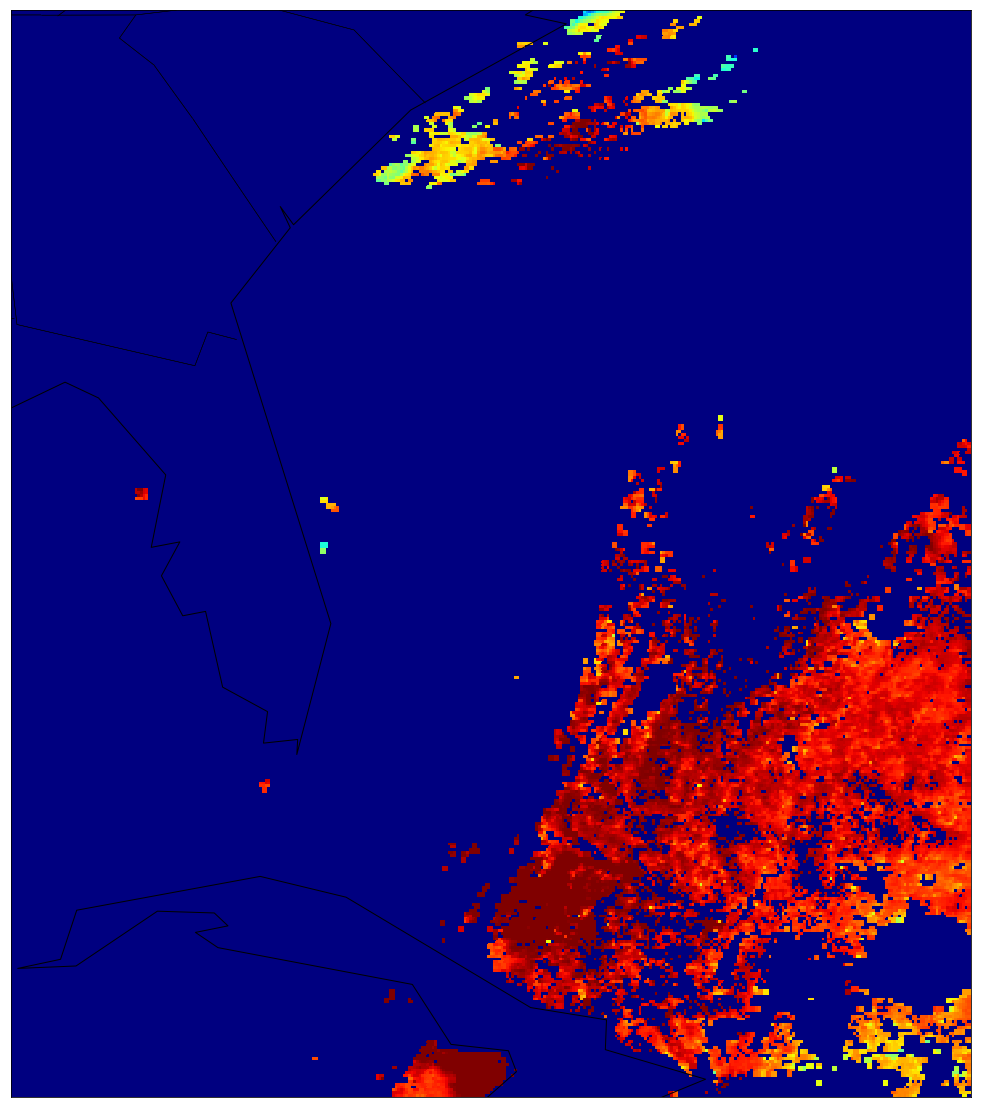

In [8]:
figsize(25,20)
plt.clf()
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_sst[:,:],cmap='jet',vmin=25,vmax=30,latlon='true')

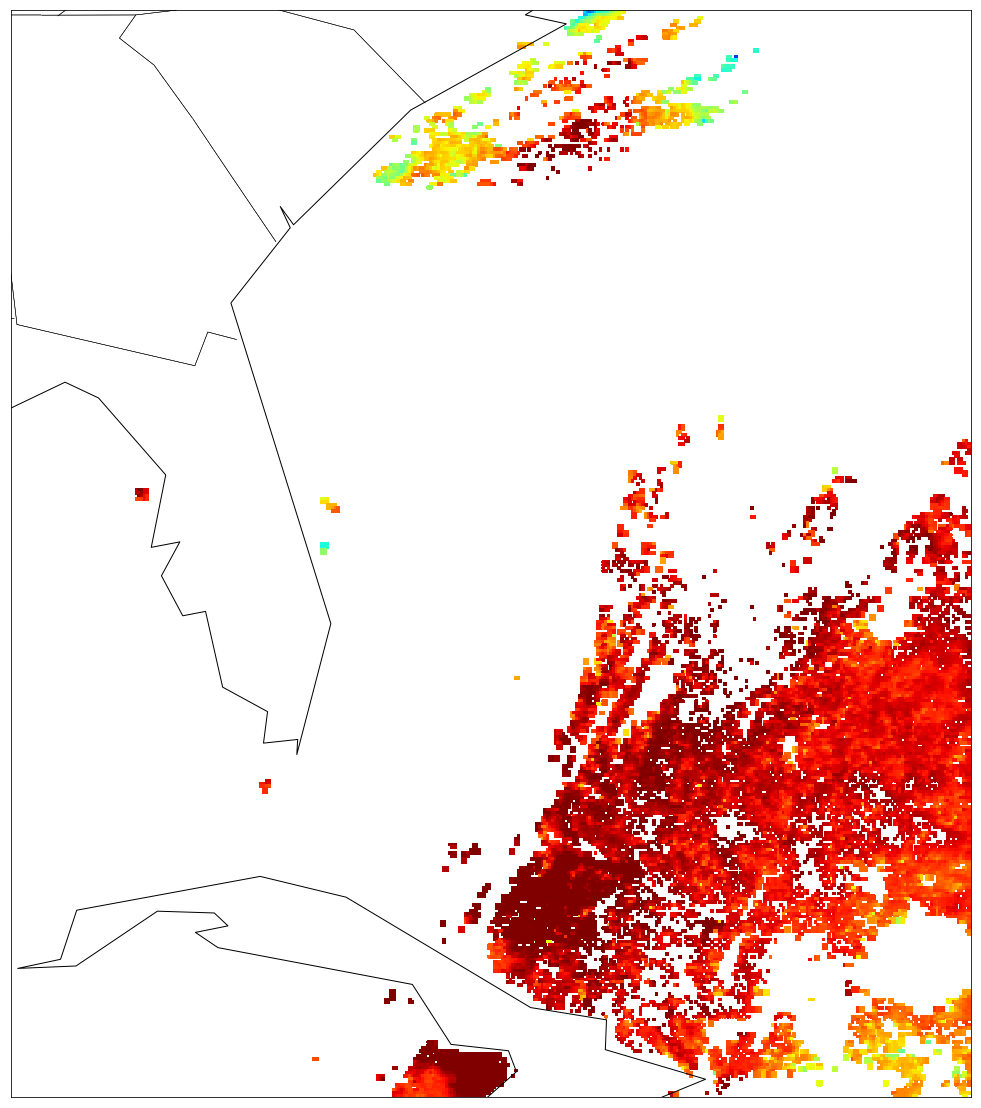

In [9]:
modis_sst[modis_sst==-999]=np.nan

figsize(25,20)
plt.clf()
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_sst[:,:],cmap='jet',vmin=25,vmax=30,latlon='true')


Text(0.5, 1.0, 'MODIS 4km SST ($^\\circ$C): 26 Aug 2017')

/Users/joezambon/anaconda3/envs/ex3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


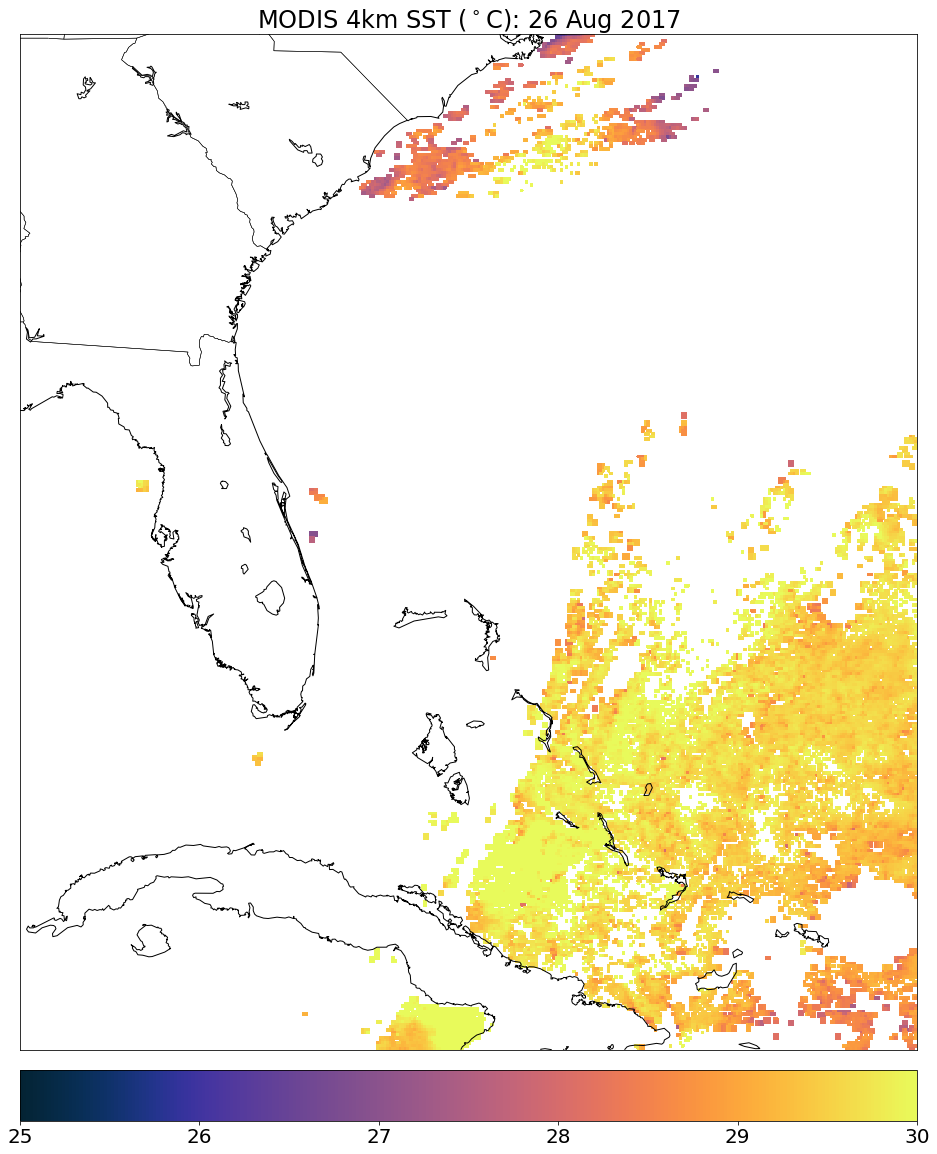

In [10]:
figsize(25,20)
plt.clf()
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_sst[:,:],cmap=cmocean.cm.thermal,vmin=25,vmax=30,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(0,30+1,1))
cbar.ax.tick_params(labelsize=20)
plt.title(('MODIS 4km SST ($^\circ$C): ' + \
          datetime.fromordinal(plot_date).strftime("%d %b %Y"))\
          ,fontsize=24,family='Helvetica')

Text(0.5, 1.0, 'MODIS 4km Chlorophyll-a (mg/m^3): 26 Aug 2017')

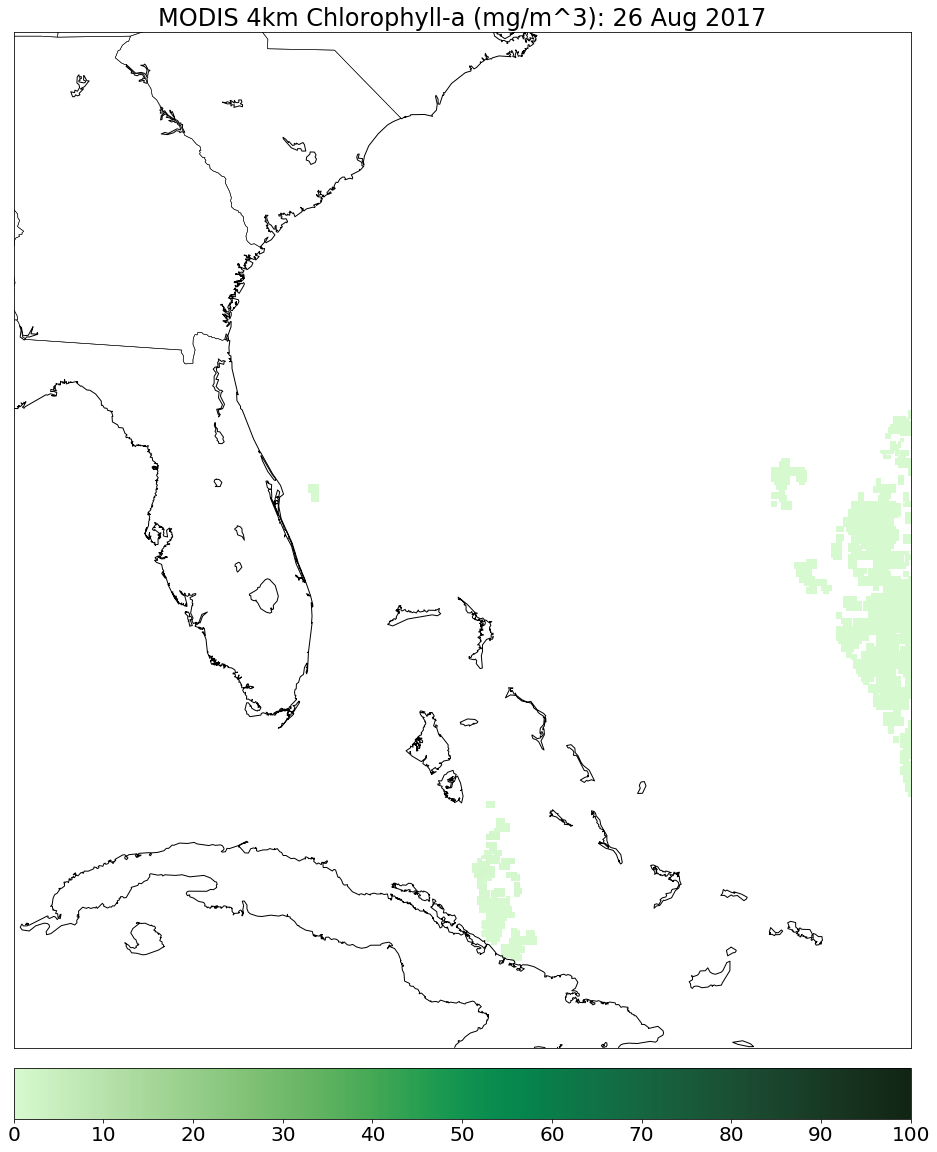

In [11]:
modis_chla[modis_chla==-999]=np.nan
figsize(25,20)
plt.clf()
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_chla[:,:],cmap=cmocean.cm.algae,vmin=0,vmax=100,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(0,100+1,10))
cbar.ax.tick_params(labelsize=20)
plt.title(('MODIS 4km Chlorophyll-a (mg/m^3): ' + \
          datetime.fromordinal(plot_date).strftime("%d %b %Y"))\
          ,fontsize=24,family='Helvetica')

Text(0.5, 1.0, 'MODIS 4km Chlorophyll-a (mg/m$^3$): 26 Aug 2017')

/Users/joezambon/anaconda3/envs/ex3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


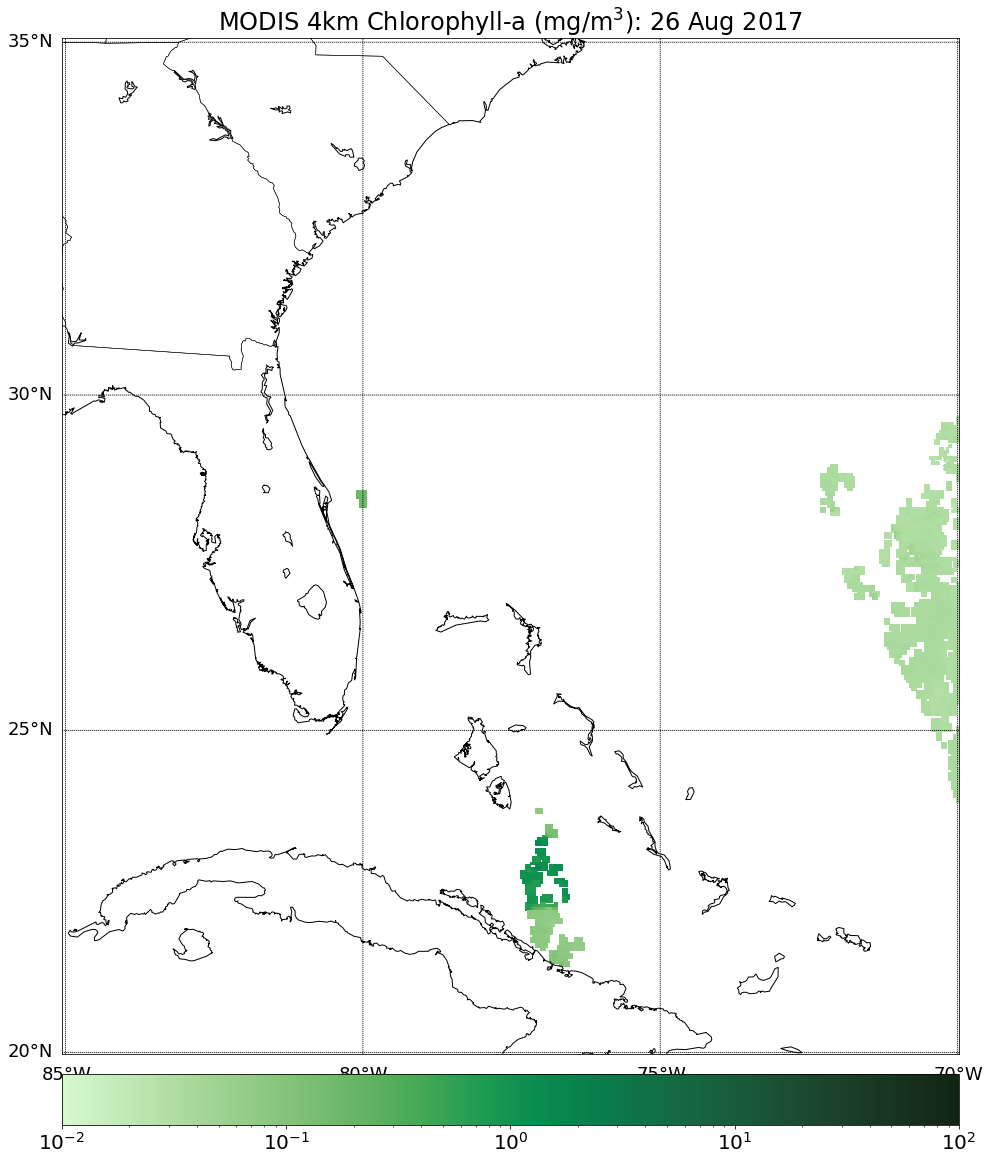

In [12]:
parallels = np.arange(0.,90,5.)
meridians = np.arange(180.,360.,5.)

figsize(25,20)
plt.clf()
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_chla[:,:],norm=LogNorm(vmin=0.01, vmax=100),cmap=cmocean.cm.algae,latlon='true')
cbar=map.colorbar(location='bottom',norm=LogNorm(vmin=0, vmax=100),ticks=[0,0.01,0.1,1,10,100])
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
cbar.ax.tick_params(labelsize=20)
plt.title(('MODIS 4km Chlorophyll-a (mg/m$^3$): ' + \
          datetime.fromordinal(plot_date).strftime("%d %b %Y"))\
          ,fontsize=24,family='Helvetica')

Text(0.5, 1.0, 'MODIS 4km Chlorophyll-a (mg/m$^3$): 26 Aug 2017')

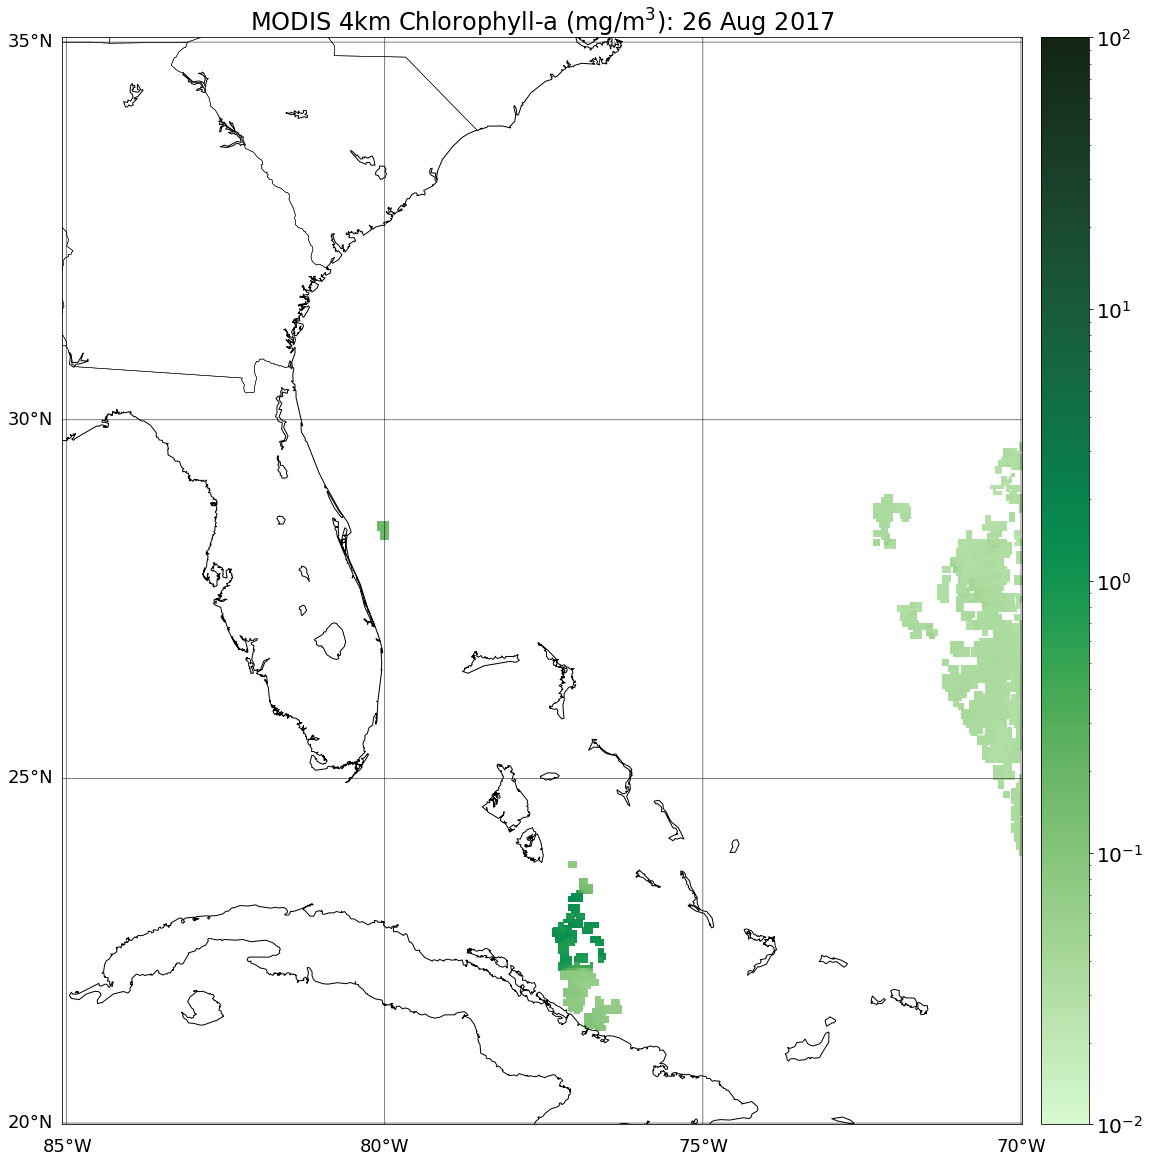

In [13]:
figsize(25,20)
plt.clf()
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_chla[:,:],norm=LogNorm(vmin=0.01, vmax=100),\
               cmap=cmocean.cm.algae,latlon='true')
cbar=map.colorbar(location='right',norm=LogNorm(vmin=0, vmax=100),ticks=[0,0.01,0.1,1,10,100])
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
cbar.ax.tick_params(labelsize=20)
plt.title(('MODIS 4km Chlorophyll-a (mg/m$^3$): ' + \
          datetime.fromordinal(plot_date).strftime("%d %b %Y"))\
          ,fontsize=24,family='Helvetica')

Text(0.5, 1.0, 'DINEOF Chlorophyll-a (mg/m$^3$)')

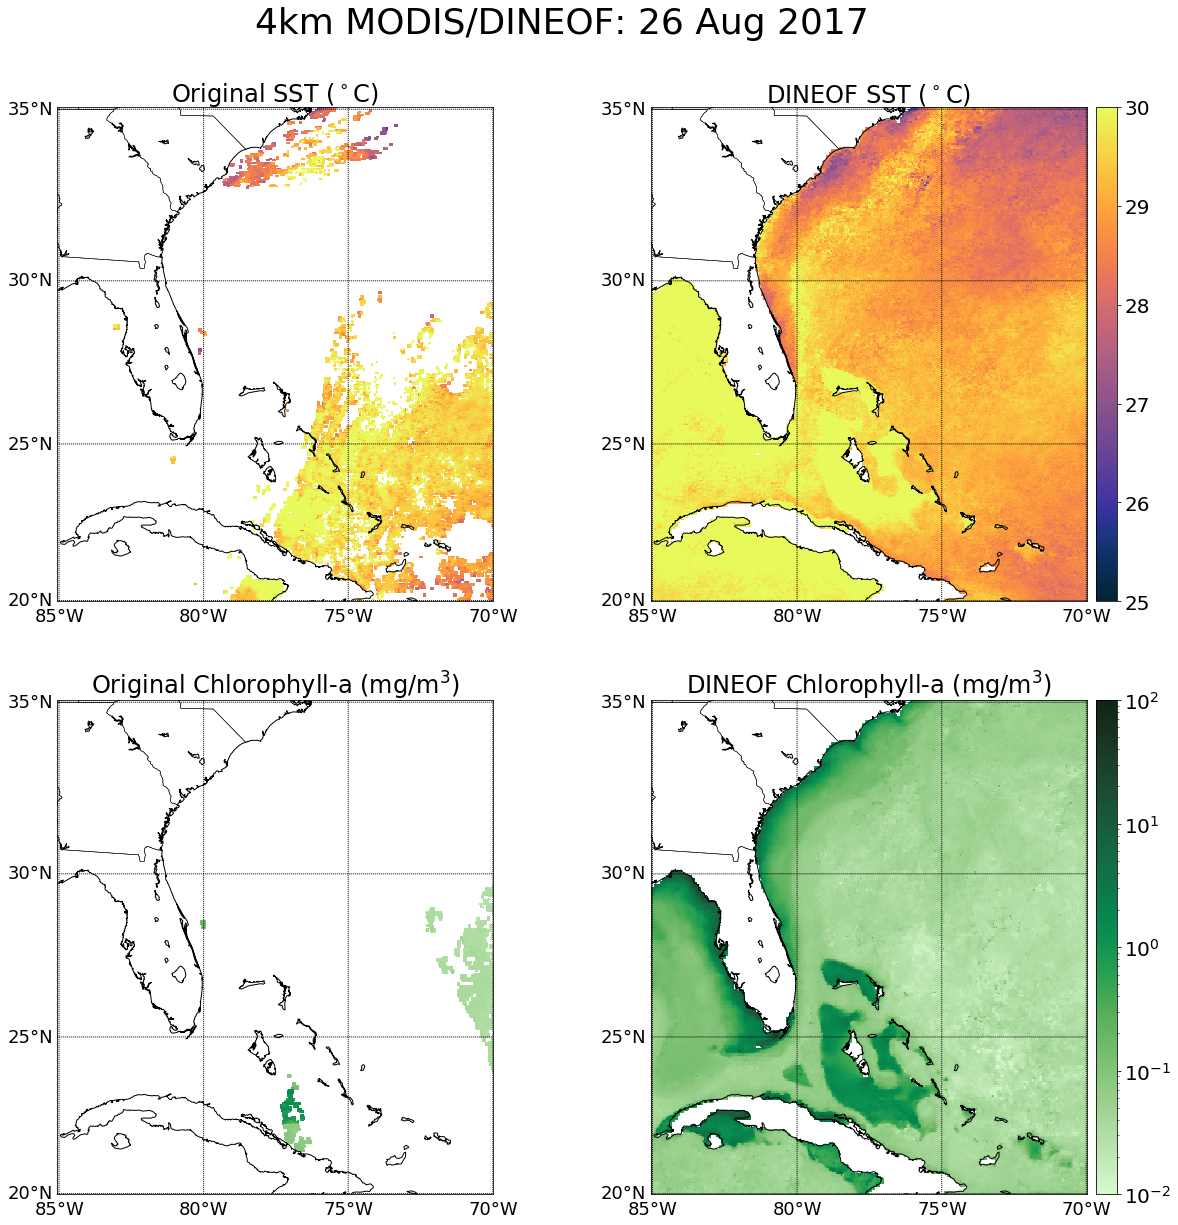

In [14]:
dineof_sst[dineof_sst==-999]=np.nan
dineof_chla[dineof_chla==-999]=np.nan

figsize(20,20)
plt.clf()

plt.suptitle('4km MODIS/DINEOF: ' + \
             datetime.fromordinal(plot_date).strftime("%d %b %Y"),\
             fontsize=36,family='Helvetica',position=(0.5,0.95))

# Original MODIS SST
plt.subplot(2,2,1)
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_sst[:,:],cmap=cmocean.cm.thermal,vmin=25,vmax=30,latlon='true')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
#cbar=map.colorbar(location='right',ticks=[arange(0,30+1,5)])
cbar.ax.tick_params(labelsize=20)
plt.title('Original SST ($^\circ$C)',fontsize=24,family='Helvetica')

# Analyzed DINEOF SST
plt.subplot(2,2,2)
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,dineof_sst[:,:],cmap=cmocean.cm.thermal,vmin=25,vmax=30,latlon='true')
cbar=map.colorbar(location='right',ticks=np.arange(0,100+1,1))
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
cbar.ax.tick_params(labelsize=20)
plt.title('DINEOF SST ($^\circ$C)',fontsize=24,family='Helvetica')

# Original MODIS Chlorophyll-a
plt.subplot(2,2,3)
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,modis_chla[:,:],norm=LogNorm(vmin=0.01, vmax=100),\
               cmap=cmocean.cm.algae,latlon='true')
#cbar=map.colorbar(location='right',norm=LogNorm(vmin=0, vmax=100),ticks=[0,0.01,0.1,1,10,100])
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
cbar.ax.tick_params(labelsize=20)
plt.title('Original Chlorophyll-a (mg/m$^3$)',fontsize=24,family='Helvetica')

# Analyzed DINEOF Chlorophyll-a
plt.subplot(2,2,4)
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(xlon,xlat,dineof_chla[:,:],norm=LogNorm(vmin=0.01, vmax=100),\
               cmap=cmocean.cm.algae,latlon='true')
cbar=map.colorbar(location='right',norm=LogNorm(vmin=0, vmax=100),ticks=[0,0.01,0.1,1,10,100])
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
cbar.ax.tick_params(labelsize=20)
plt.title('DINEOF Chlorophyll-a (mg/m$^3$)',fontsize=24,family='Helvetica')